# **ARTIFICIAL INTELLIGENCE FOR BUSINESS DECISIONS AND TRANSFORMATION CSCN8030**
# Group:1 
# **ASSIGNMENT: 1**
# Prashansa Rathod - 8993410
# Harsh Joshi – 8952840
# Jaiv Burman - 8930180
# Nidhi Ahir – 9041129
# Nil Kumar Patel - 8983991
 


# **PART: 2 Data Analysis and Visualization**

- Insights from Data Analysis
1. The dataset provides detailed records of animal intakes and outcomes from Austin Animal Center.
2. Key outcome types include Adoption, Transfer, Return to Owner, Euthanasia, and more.
3.  Adoption is the most frequent outcome, highlighting its importance in shelter operations.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets with proper encoding
intakes_path = 'Austin_Animal_Center_Intakes.csv'  
outcomes_path = 'Austin_Animal_Center_Outcomes.csv' 

# Try using 'latin1' encoding to read the files
intakes_df = pd.read_csv(intakes_path, encoding='latin1')
outcomes_df = pd.read_csv(outcomes_path, encoding='latin1')

# Display the first few rows of each dataset
print("Intakes Dataset:")
display(intakes_df.head())
print("\nOutcomes Dataset:")
display(outcomes_df.head())



Intakes Dataset:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray



Outcomes Dataset:


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


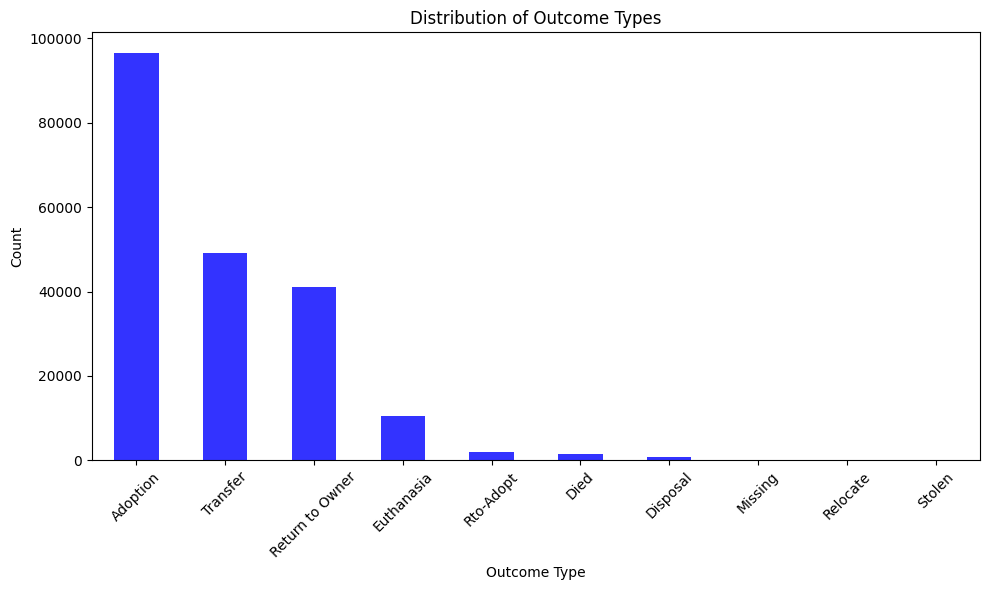

In [14]:
# Merge datasets based on common identifiers (e.g., Animal ID)
merged_df = pd.merge(intakes_df, outcomes_df, on="Animal ID", how="inner")

# Analyze trends: Outcomes distribution
outcome_counts = merged_df["Outcome Type"].value_counts()

# Visualization: Outcomes distribution
plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color='blue', alpha=0.8)
plt.title("Distribution of Outcome Types")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

- **Proposed DSS-Based Solutions**
1. **Outcome Prediction System:**

- Objective: Forecast the likely outcomes (adoption, transfer, etc.) for incoming animals.
- Implementation: Use machine learning models to analyze historical data and predict outcomes based on attributes such as age, breed, and health condition.

2. **Adoption Priority Dashboard:**

- Objective: Identify animals with lower adoption probabilities and prioritize their visibility to adopters.
- Implementation: Create a dashboard highlighting animals at higher risk of prolonged stays or euthanasia.

3. **Seasonal Intake and Outcome Analysis:**

- Objective: Prepare shelters for seasonal trends in intakes and outcomes.
- Implementation: Use time-series analysis to predict seasonal variations and align resources accordingly.

4. **Enhanced Animal Profile System:**

- Objective: Increase adoption rates by providing detailed and visually appealing animal profiles.
- Implementation: Use AI-powered tools to generate descriptive profiles, including photos and behavior summaries.

5. **Resource Allocation Tool:**

- Objective: Optimize shelter resources (e.g., food, space) based on predicted intake trends.
- Implementation: Integrate predictive analytics into resource planning modules.

# **Part 3: Building a Simple AI Model**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the outcomes dataset
outcomes_path = 'Austin_Animal_Center_Outcomes.csv'
outcomes_df = pd.read_csv(outcomes_path, encoding='latin1')

# Select relevant features and target variable
features = ['Animal Type', 'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color']
target = 'Outcome Type'

# Handle missing values
outcomes_df = outcomes_df.dropna(subset=features + [target])

# Encode categorical variables
X = pd.get_dummies(outcomes_df[features], drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(outcomes_df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=range(len(label_encoder.classes_)), target_names=label_encoder.classes_)

print("Accuracy of the AI Model:", accuracy)
print("\nClassification Report:\n", report)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nTop Features Contributing to Predictions:\n", feature_importance.head())

# Decision-Making Integration
print("\nThis model can help prioritize actions based on predicted outcomes, improving resource allocation and decision-making in the shelter.")


Accuracy of the AI Model: 0.6792776208461612

Classification Report:
                  precision    recall  f1-score   support

       Adoption       0.72      0.87      0.79     14939
           Died       0.14      0.02      0.04       321
       Disposal       0.32      0.05      0.08       155
     Euthanasia       0.76      0.56      0.64      1940
        Missing       0.20      0.05      0.08        19
       Relocate       0.00      0.00      0.00         3
Return to Owner       0.47      0.37      0.41      4983
      Rto-Adopt       0.04      0.01      0.01       215
         Stolen       0.00      0.00      0.00         0
       Transfer       0.68      0.62      0.65      8932

       accuracy                           0.68     31507
      macro avg       0.33      0.25      0.27     31507
   weighted avg       0.66      0.68      0.66     31507


Top Features Contributing to Predictions:
                            Feature  Importance
6   Sex upon Outcome_Spayed Female    

c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri